<a href="https://colab.research.google.com/github/yongjun1994/branchTest/blob/main/13_%EC%84%9C%EC%9A%B8_%EC%9E%90%EC%A0%84%EA%B1%B0_%EA%B3%B5%EC%9C%A0_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 서울 자전거 공유 수요 데이터셋
[서울시의 공공자전거 대여 서비스인 ‘따릉이’의 대여 수요를 예측하는 문제에 사용되는 데이터셋](https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing/data)입니다. 특정 시간대와 날씨, 요일, 공휴일 여부, 기온, 습도 등 다양한 데이터를 활용하여 자전거 대여 수요를 예측합니다.

# 2. 데이터셋 컬럼
* Date : 연월일
* Rented Bike count - 매 시간마다 대여한 자전거 수
* Hour - 하루 중 시간
* Temperature - 온도
* Humidity - 습도 %
* Windspeed - 풍속 m/s
* Visibility - 가시거리 m
* Dew point temperature - 이슬점 온도
* Solar radiation - 태양 복사 MJ/m2
* Rainfall - 강우량 mm
* Snowfall - 적설량 cm
* Seasons - 겨울, 봄, 여름, 가을
* Holiday - 휴일/휴일 없음
* Functional Day - 운영되지 않았던 날, 정상적으로 운영된 날

In [ ]:
# /content/drive/MyDrive/컴퓨터비전 시즌3/3. 데이터분석/Data/SeoulBikeData.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bike_df = pd.read_csv('/content/drive/MyDrive/컴퓨터비전 시즌3/3. 데이터분석/Data/SeoulBikeData.csv', encoding='CP949')
bike_df

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### CP949
* Microsoft Windows의 한국어 문자 인코딩입니다.
* EUC-KR을 확장한 형태로, 더 많은 한국어 문자(한자, 확장 문자 등)를 지원합니다.
* 주로 Windows 환경에서 저장된 한글 파일에서 사용됩니다.

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [ ]:
bike_df.describe() # 통계치

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
bike_df.columns = ['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature',
       'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning Day']

In [ ]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


<Axes: xlabel='Temperature', ylabel='Rented Bike Count'>

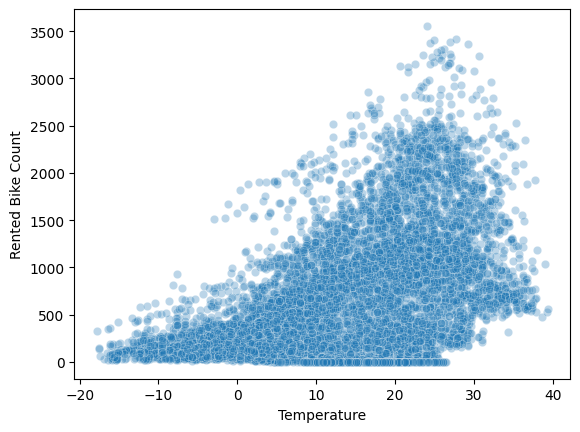

In [ ]:
sns.scatterplot(x='Temperature', y='Rented Bike Count', data=bike_df, alpha=0.3) # alpha=0.3 : 투명도 0.3

<Axes: xlabel='Wind speed', ylabel='Rented Bike Count'>

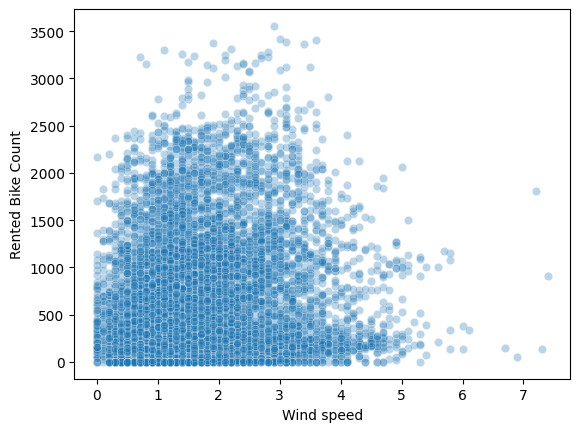

In [ ]:
sns.scatterplot(x='Wind speed', y='Rented Bike Count', data=bike_df, alpha=0.3)

<Axes: xlabel='Visibility', ylabel='Rented Bike Count'>

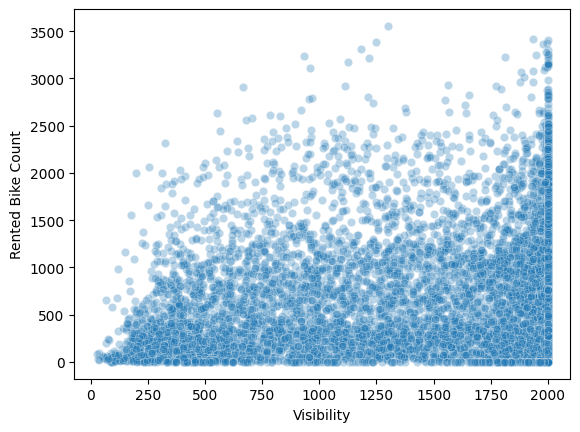

In [ ]:
sns.scatterplot(x='Visibility', y='Rented Bike Count', data=bike_df, alpha=0.3)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

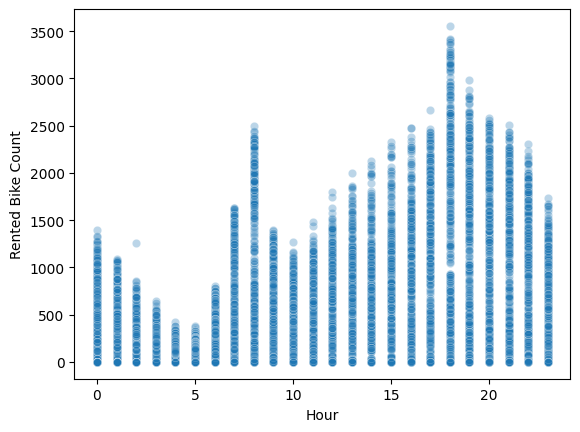

In [ ]:
sns.scatterplot(x='Hour', y='Rented Bike Count', data=bike_df, alpha=0.3)

In [ ]:
bike_df.isna().sum() # na값이 없음

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature,0
Humidity,0
Wind speed,0
Visibility,0
Dew point temperature,0
Solar Radiation,0
Rainfall,0


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
# 2025/01/08
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [ ]:
bike_df['year'] = bike_df['Date'].dt.year   # 연도 추출
bike_df['month'] = bike_df['Date'].dt.month  # 월 추출
bike_df['day'] = bike_df['Date'].dt.day      # 일 추출
bike_df.head()  # 데이터 확인

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


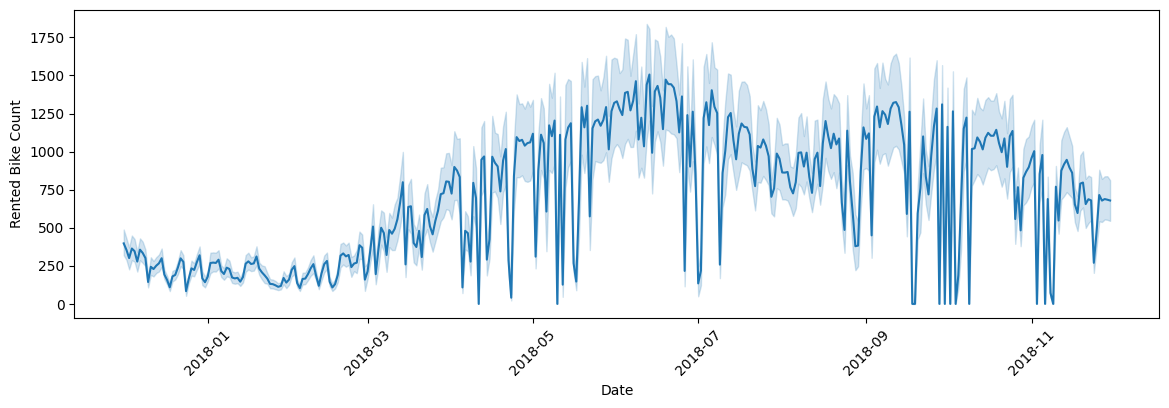

In [ ]:
plt.figure(figsize=(14, 4))
sns.lineplot(x='Date', y='Rented Bike Count', data=bike_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# bike_df[bike_df['year'] == 2017]: bike_df 데이터프레임에서 연도가 2017년인 데이터를 필터링합니다.
# .groupby('month'): 필터링된 데이터를 월별로 그룹화합니다.
# ['Rented Bike Count'].mean(): 그룹화된 각 월의 자전거 대여 수 평균을 계산
bike_df[bike_df['year'] == 2017].groupby('month')['Rented Bike Count'].mean()

,Rented Bike Count
month,
12,249.099462


In [ ]:
bike_df[bike_df['year'] == 2018].groupby('month')['Rented Bike Count'].mean()

,Rented Bike Count
month,
1,201.620968
2,225.941964
3,511.551075
4,728.093056
5,950.387097
6,1245.676389
7,987.177419
8,876.192204
9,935.572222


In [ ]:
# bins=[-1, 5, 12, 17, 23] # -1 < x <= 5
# include_lowest=True : 구간 맨 앞의 시작점(0) 포함

# bins=[0, 5, 12, 17, 23]: 시간대를 나누는 경계값입니다.
# 0 ~ 5 → Dawn (새벽)
# 6 ~ 12 → Morning (아침)
# 13 ~ 17 → Afternoon (오후)
# 18 ~ 23 → Evening (저녁)
# labels=['Dawn', 'Morning', 'Afternoon', 'Evening']: 각 구간에 할당될 레이블입니다.
# include_lowest=True: 첫 번째 구간(0~5)을 포함하여 최소값도 구간에 포함되게 설정합니다.

bike_df['TimeOfDay'] = pd.cut(bike_df['Hour'], bins=[0, 5, 12, 17, 23],
                              labels=['Dawn', 'Morning', 'Afternoon', 'Evening'],
                              include_lowest=True
                              )

### pd.cut()
pd.cut()은 숫자 데이터를 구간(bins)으로 나누어 범주형 데이터로 변환하는 데 사용됩니다. 주로 연속형 데이터를 특정 범주로 분류할 때 활용됩니다.

* bins: 숫자 데이터를 나눌 경계값(구간)입니다.
* 주의: bins의 경계값은 오른쪽 경계값(])을 포함합니다.

In [ ]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn


<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

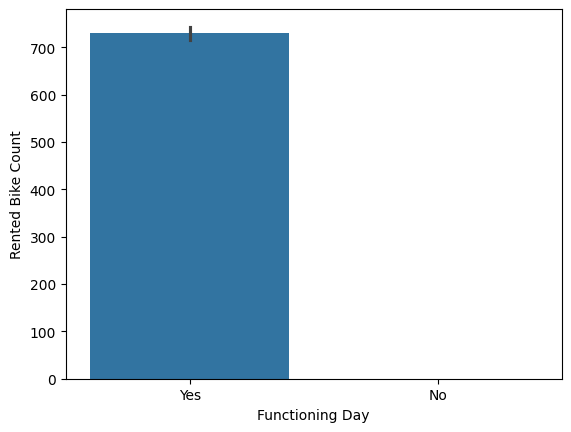

In [ ]:
# x='Functioning Day': x축은 "Functioning Day" 열(운영 여부)입니다. 보통 이 열의 값은 "Yes" (운영) 또는 "No" (비운영)으로 나누어집니다.
# y='Rented Bike Count': y축은 자전거 대여 수입니다.
# data=bike_df: bike_df 데이터프레임을 사용합니다.
# sns.barplot(): 기본적으로 평균값을 보여주는 막대 그래프입니다.
sns.barplot(x='Functioning Day', y='Rented Bike Count', data=bike_df)

### barplot의 bar의 역할
* 신뢰구간(CI): 평균값이 속할 것으로 예상되는 값의 범위입니다.
* 바 그래프에서 신뢰구간: 검은색 심지(Error Bar)로 나타납니다.
* 신뢰구간이 좁다: 평균값에 대한 확신이 높다.
* 신뢰구간이 넓다: 평균값에 대한 확신이 낮고 데이터가 흩어져 있다.

In [ ]:
bike_df['Functioning Day'].value_counts()

,count
Functioning Day,
Yes,8465
No,295


In [ ]:
bike_df[bike_df['Functioning Day'] == 'Yes']

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening


In [ ]:
bike_df[bike_df['Functioning Day'] == 'No']

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [ ]:
bike_df = bike_df.drop('Date', axis=1)
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn


In [ ]:
#  "Functioning Day" 열의 각 값이 몇 번 등장하는지 세어
bike_df.select_dtypes(exclude=['number']).columns.tolist()

['Seasons', 'Holiday', 'Functioning Day', 'TimeOfDay']

In [ ]:
for i in bike_df.select_dtypes(exclude=['number']).columns.tolist():
    print(i, bike_df[i].nunique())

Seasons 4
Holiday 2
Functioning Day 2
TimeOfDay 4


> 다중공선성(Multicollinearity)은 회귀 분석에서 독립 변수들(설명 변수) 간에 강한 상관관계가 존재하는 현상을 의미합니다. 이러한 상관관계가 높으면 각 독립 변수가 종속 변수에 미치는 개별적인 영향을 정확하게 추정하기 어려워지며, 회귀 계수의 추정치가 불안정해져 작은 데이터 변화에도 크게 변할 수 있습니다. 이는 모델의 예측 성능 저하와 해석의 신뢰성 감소로 이어질 수 있으므로, 다중공선성이 높은 변수를 식별하고 제거하거나 조정하는 것이 중요합니다.

In [ ]:
bike_df = pd.get_dummies(bike_df, columns=bike_df.select_dtypes(exclude=['number']).columns.tolist(), drop_first=True)
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,...,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,TimeOfDay_Morning,TimeOfDay_Afternoon,TimeOfDay_Evening
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False


### corr() 함수
corr() 함수는 데이터프레임의 숫자형 열 간의 상관관계를 계산하는 데 사용됩니다. 상관관계는 두 변수 간의 선형 관계를 나타내며, 주로 -1에서 1 사이의 값으로 표현됩니다.

* corr()는 Pearson 상관계수를 기본으로 사용합니다.
* 숫자형 열만 상관관계 분석에 포함됩니다.
* 높은 상관관계(>|0.5|): 강한 관계
* 낮은 상관관계(<|0.2|): 약한 관계

> corr()를 사용하여 높은 상관관계를 가진 컬럼을 식별하고 제거할지 여부를 판단할 수 있습니다. 특히, 다중공선성(multicollinearity) 문제가 발생할 경우 머신러닝 모델의 성능이 저하될 수 있으므로, 상관관계가 높은 컬럼을 적절히 제거하는 것이 중요합니다.

In [ ]:
# 모든 컬럼 간 상관관계 분석
correlation_matrix = bike_df.corr()
correlation_matrix

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,...,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,TimeOfDay_Morning,TimeOfDay_Afternoon,TimeOfDay_Evening
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,...,1.335139e-01,2.229091e-02,2.288822e-02,2.965494e-01,-4.249251e-01,7.233757e-02,0.203943,-7.800863e-02,1.379792e-01,3.229776e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,...,1.749134e-15,1.450952e-16,-1.159917e-15,8.578102e-16,-1.697335e-15,1.289087e-16,0.005439,-2.317508e-01,2.593779e-01,7.506519e-01
Temperature,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,...,2.161826e-01,1.564544e-02,7.959684e-03,6.658462e-01,-7.387196e-01,5.593084e-02,-0.050170,-5.221581e-02,1.618758e-01,1.906132e-02
Humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,...,1.398748e-01,-2.904392e-02,1.569416e-02,1.925949e-01,-2.382952e-01,5.027765e-02,-0.020800,5.227350e-02,-3.357123e-01,-2.142835e-03
Wind speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,...,-1.567102e-01,-3.197744e-02,8.385451e-02,-6.469790e-02,1.091865e-01,-2.301677e-02,0.005037,-1.177761e-01,3.411470e-01,6.704981e-02
Visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,...,6.487420e-02,-1.017585e-01,-1.874983e-01,6.195792e-02,8.616224e-03,-3.177281e-02,-0.026000,-7.751020e-02,7.720654e-02,6.566160e-02
Dew point temperature,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,...,2.425519e-01,1.525311e-04,2.055888e-03,6.523778e-01,-7.223664e-01,6.675910e-02,-0.052837,-1.919050e-02,-1.917339e-02,2.327422e-02
Solar Radiation,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,...,-3.159544e-02,-2.981839e-03,7.997416e-02,1.284017e-01,-1.784202e-01,5.077255e-03,-0.007665,1.980016e-01,5.214868e-01,-3.186951e-01
Rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,...,1.195810e-02,-1.623338e-03,1.759519e-02,5.392817e-02,-5.875456e-02,1.426911e-02,0.002055,1.542888e-02,-1.242190e-02,1.294048e-02
Snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,...,5.312091e-02,1.020774e-01,-9.978516e-02,-9.978516e-02,2.258745e-01,1.259072e-02,0.032089,4.054324e-02,-1.969529e-02,-2.251644e-02


In [ ]:
# 목표 변수와의 상관관계만 확인
# Rented Bike Count" 열과 다른 열들 간의 상관계수를 내림차순으로 정렬하여 출력
target_corr = correlation_matrix['Rented Bike Count'].sort_values(ascending=False)
print(target_corr)

Rented Bike Count        1.000000
Temperature              0.538558
Hour                     0.410257
Dew point temperature    0.379788
TimeOfDay_Evening        0.322978
Seasons_Summer           0.296549
Solar Radiation          0.261837
year                     0.215162
Functioning Day_Yes      0.203943
Visibility               0.199280
TimeOfDay_Afternoon      0.137979
month                    0.133514
Wind speed               0.121108
Holiday_No Holiday       0.072338
Seasons_Spring           0.022888
day                      0.022291
TimeOfDay_Morning       -0.078009
Rainfall                -0.123074
Snowfall                -0.141804
Humidity                -0.199780
Seasons_Winter          -0.424925
Name: Rented Bike Count, dtype: float64


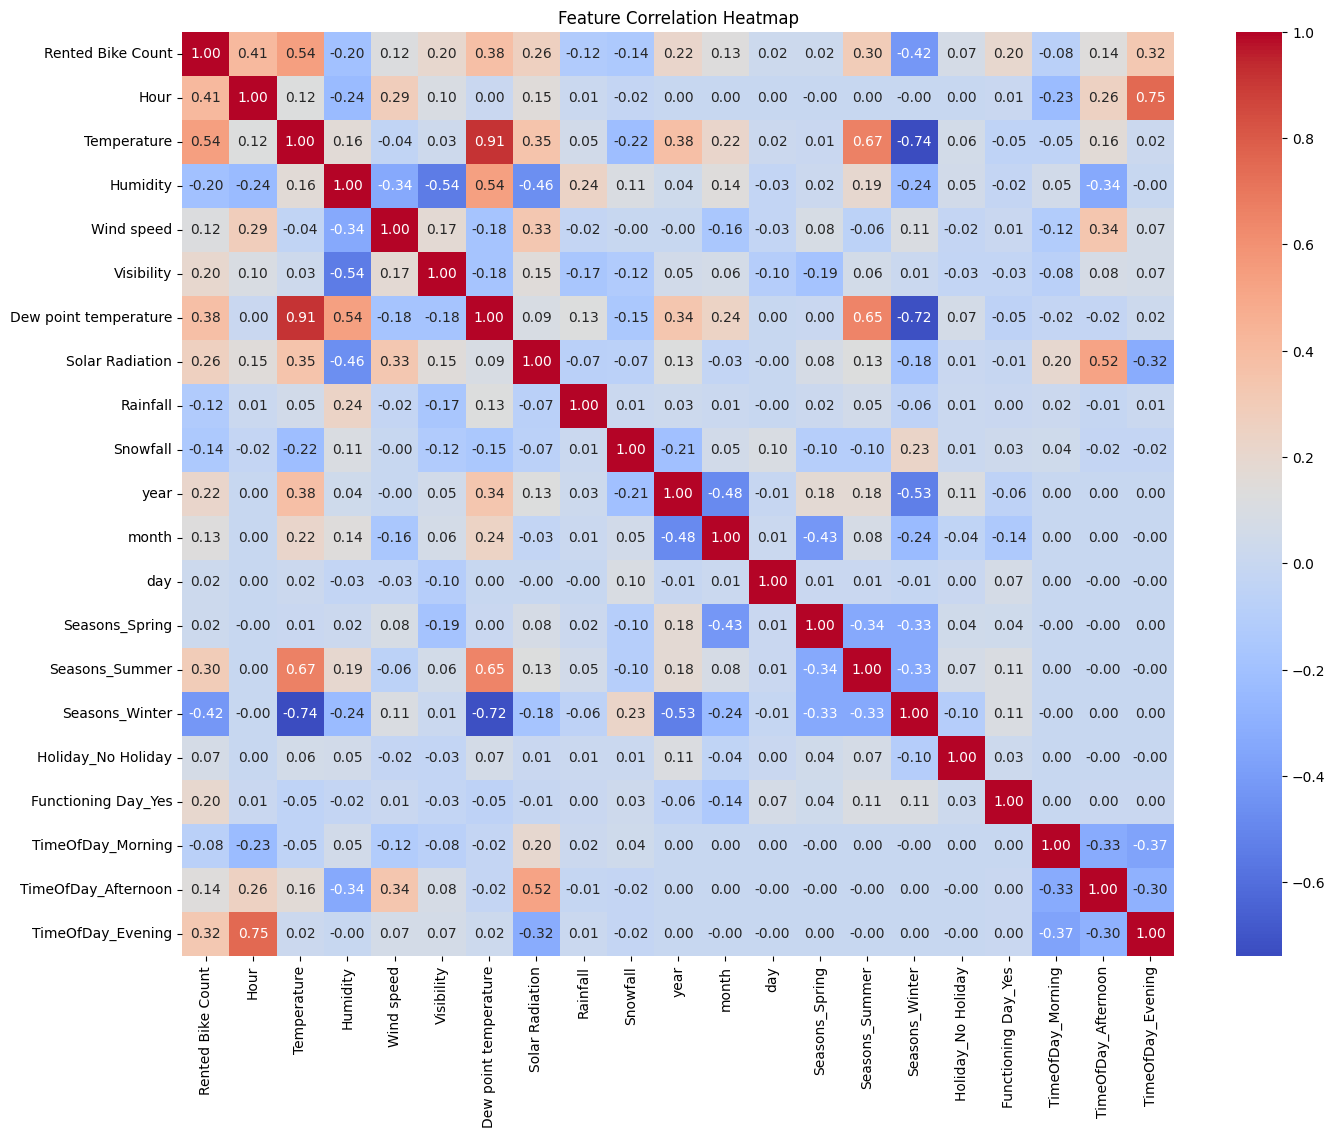

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
bike_df = bike_df.drop(['Dew point temperature'], axis=1)
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,year,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,TimeOfDay_Morning,TimeOfDay_Afternoon,TimeOfDay_Evening
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Humidity             8760 non-null   int64  
 4   Wind speed           8760 non-null   float64
 5   Visibility           8760 non-null   int64  
 6   Solar Radiation      8760 non-null   float64
 7   Rainfall             8760 non-null   float64
 8   Snowfall             8760 non-null   float64
 9   year                 8760 non-null   int32  
 10  month                8760 non-null   int32  
 11  day                  8760 non-null   int32  
 12  Seasons_Spring       8760 non-null   bool   
 13  Seasons_Summer       8760 non-null   bool   
 14  Seasons_Winter       8760 non-null   bool   
 15  Holiday_No Holiday   8760 non-null   b

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bike_df.drop(['Rented Bike Count'], axis=1),
                                                    bike_df['Rented Bike Count'],
                                                    test_size=0.3,random_state=2025)

In [ ]:
X_train.shape, X_test.shape

((6132, 19), (2628, 19))

In [ ]:
y_train.shape, y_test.shape

((6132,), (2628,))

# **4. 결정 트리**
결정 트리(Decision Tree)는 데이터를 기반으로 의사결정을 수행하는 트리 구조의 예측 모델입니다. 루트 노드(root node)에서 시작해 각 노드는 특정 특성(feature)의 조건에 따라 가지(branch)로 분기되며, 최종적으로 리프 노드(leaf node)에 도달해 예측 결과(클래스나 값)를 도출합니다. 주로 분류(Classification)와 회귀(Regression) 문제에 사용되며, 데이터의 패턴을 직관적으로 시각화할 수 있어 해석이 용이합니다. 하지만 트리가 너무 깊어지면 과적합(overfitting) 문제가 발생할 수 있으므로 가지치기(pruning)나 최대 깊이 설정 등으로 제어해야 합니다.

* 전체 데이터셋을 하나의 노드로 시작합니다.
* 최적의 특성(feature)과 분할 기준(threshold)을 찾아 첫 번째 분할을 수행합니다.
* 분류 (Classification):
    * Gini 불순도(Gini Impurity): 얼마나 다른 데이터가 섞여있는지를 나타냄
    * 엔트로피(Entropy) : 높을수록 데이터 섞여있고 예측 힘듬
* 회귀 (Regression):
    * 평균 제곱 오차(Mean Squared Error, MSE)
    * 절대 평균 오차(Mean Absolute Error, MAE)
* 각 하위 노드에 대해 위 단계를 반복합니다.
* 이 과정을 통해 트리는 여러 깊이로 성장합니다.
* 모든 노드가 더 이상 나눌 수 없거나 특정 조건(max_depth, min_samples_split)을 만족할 때까지 반복됩니다.
* 더 이상 분할이 불가능할 때 리프 노드가 생성됩니다.
* 분류 문제: 가장 많은 클래스가 있는 클래스를 예측값으로 사용
* 회귀 문제: 평균값을 예측값으로 사용


### Gini 불순도 (Gini Impurity)

Gini 불순도는 한 노드에 있는 데이터의 순수도(Purity)를 측정하는 지표입니다.
한 노드에 있는 샘플들이 동일한 클래스에 속할 확률이 높을수록 Gini 불순도는 낮아집니다.
즉, 노드가 "얼마나 섞여 있는지"를 나타냅니다.

### 엔트로피 (Entropy)

* 엔트로피는 정보의 불확실성(혼란도, Uncertainty)을 측정합니다.
* 엔트로피가 높을수록 해당 노드에 있는 데이터는 더 섞여 있으며, 예측하기 어렵습니다.
* 엔트로피는 데이터가 균등하게 분포될 때 최대값을 가집니다.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

<Axes: xlabel='Rented Bike Count'>

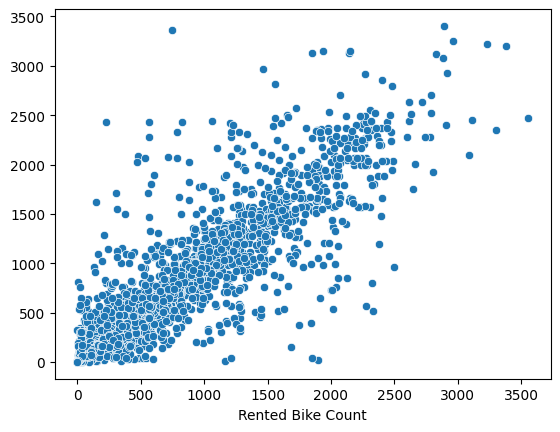

In [ ]:
dtr = DecisionTreeRegressor(random_state=2025)
dtr.fit(X_train, y_train) # 학습시킴, X_train: train 데이터, y_train : train에 쓰일 정답
pred1 = dtr.predict(X_test) # 정답지

sns.scatterplot(x=y_test, y=pred1)

### DecisionTreeRegressor
DecisionTreeRegressor는 주어진 데이터를 반복적으로 분할하여 예측을 수행합니다. 각 분할은 데이터의 목표 변수 값을 예측하는 데 가장 적합한 값을 찾기 위해 이루어집니다. 이를 통해 데이터를 점차 더 작은 부분으로 나누고, 각 부분에서 평균값을 예측값으로 사용하는 방식입니다. DecisionTreeRegressor  데이터를 두 가지 그룹으로 분할합니다. 각 분할에서 목표는 두 그룹의 MSE가 가능한 한 낮도록 만드는 것입니다. 즉, 각 분할에서의 MSE가 최소화되도록 분할점을 찾습니다.

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
root_mean_squared_error(y_test, pred1)

312.2793833124581

In [ ]:
from sklearn.linear_model import LinearRegression

<Axes: xlabel='Rented Bike Count'>

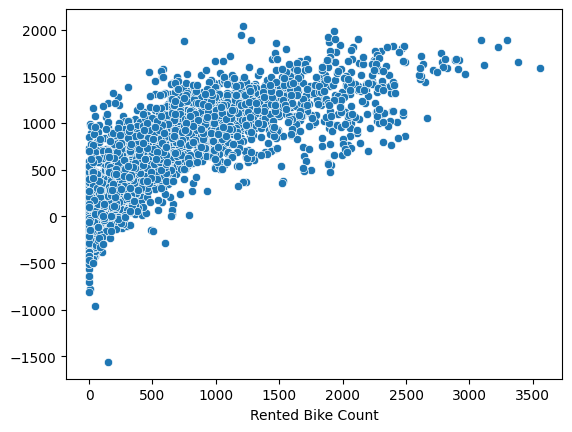

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred2 = lr.predict(X_test)

sns.scatterplot(x=y_test, y=pred2)

In [ ]:
root_mean_squared_error(y_test, pred2)

418.4532932542791

In [ ]:
# 결정 트리 RMSE: 317.42040853326466
# 선형 회귀 RMSE: 418.87021492000815

In [ ]:
# 하이퍼 파라미터 적용
dtr = DecisionTreeRegressor(random_state=2025, max_depth=50, min_samples_leaf=30)
dtr.fit(X_train, y_train)
pred3 = dtr.predict(X_test)

root_mean_squared_error(y_test, pred3)

293.44393572577195

In [ ]:
# 결정 트리 RMSE: 317.42040853326466
# 결정 트리 하이퍼파라미터 뉴닝 후 RMSE : 301.51143804885044 => 성능 개선됨
# 선형 회귀 RMSE: 418.87021492000815

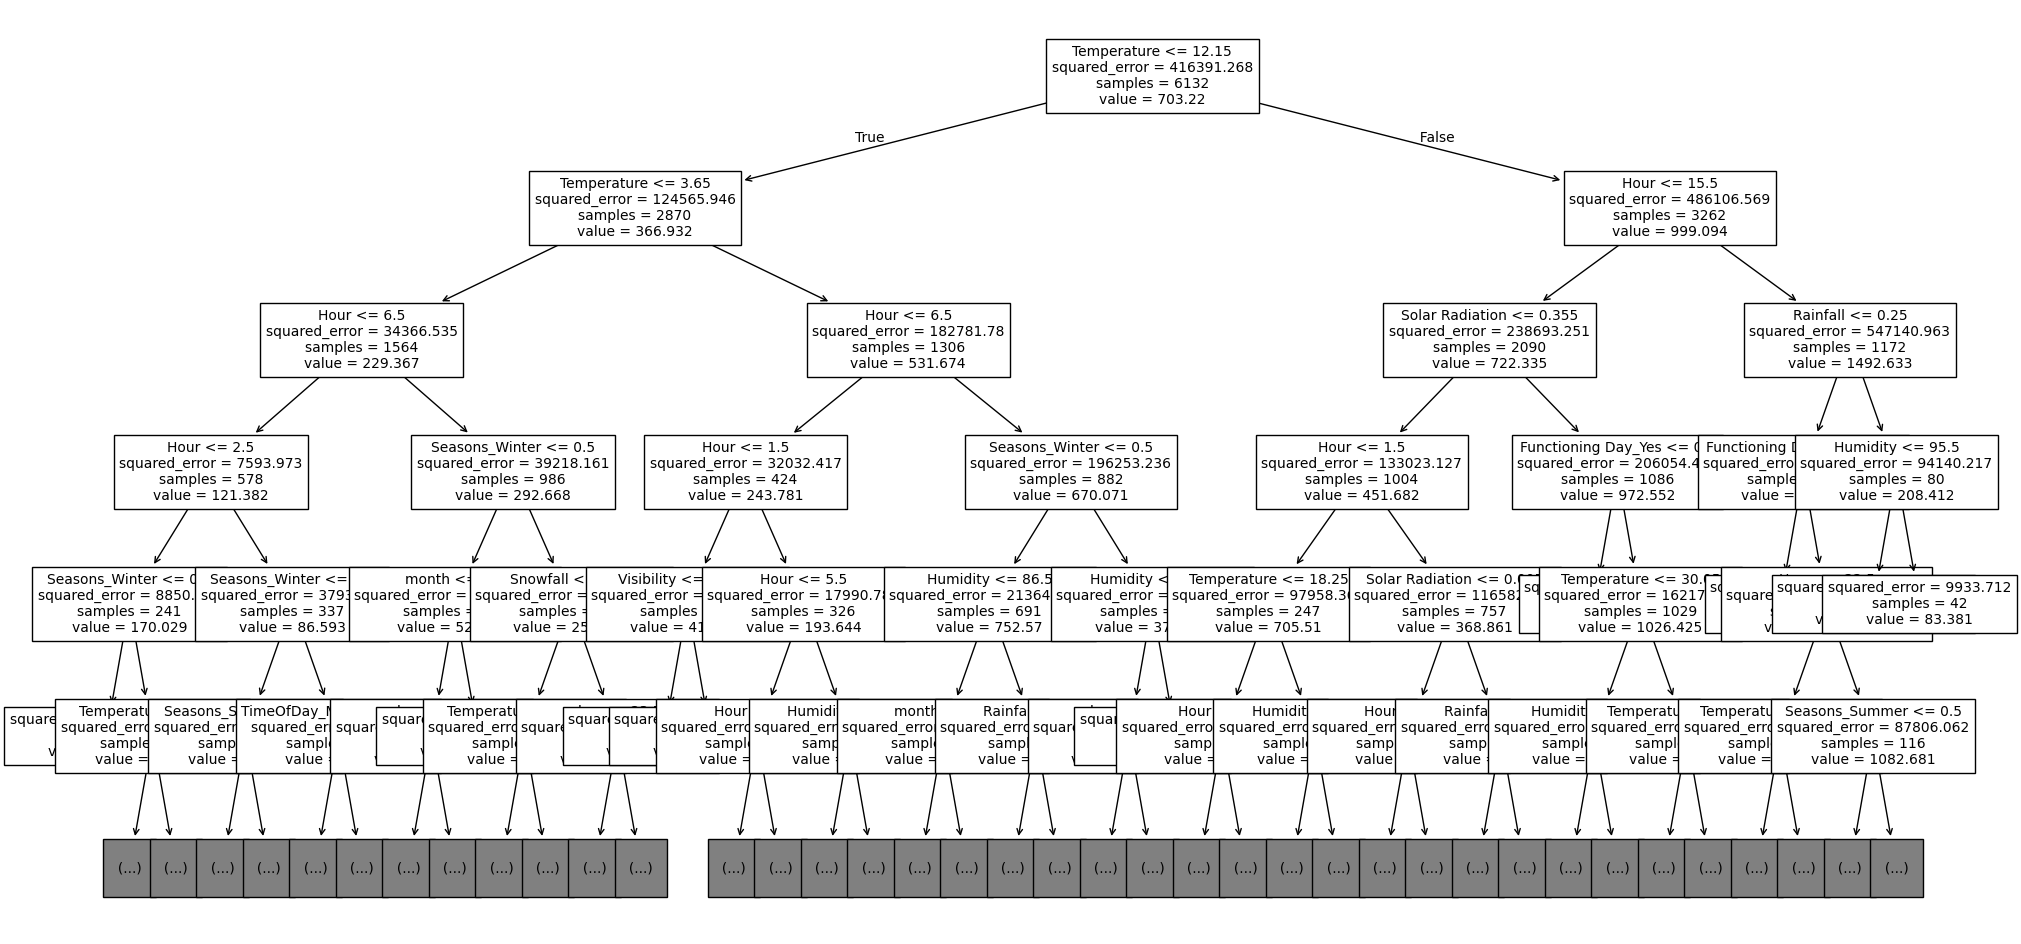

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 12))
plot_tree(dtr, max_depth=5, fontsize=10, feature_names=X_train.columns)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=2025)
rf.fit(X_train, y_train)
pred4 = rf.predict(X_test)
root_mean_squared_error(y_test, pred4)

234.36031694784307

In [ ]:
# 결정 트리 RMSE: 317.42040853326466
# 결정 트리 하이퍼파라미터 뉴닝 후 RMSE : 301.51143804885044 => 성능 개선됨
# 선형 회귀 RMSE: 418.87021492000815
# 랜덤포레스트 RMSE: 242.2675864855422

In [ ]:
rf.feature_importances_

array([0.27219277, 0.32438274, 0.08282862, 0.01612509, 0.01601127,
       0.09249295, 0.03965094, 0.00077546, 0.00033406, 0.02218559,
       0.01686462, 0.00162997, 0.00168991, 0.01550156, 0.00242081,
       0.08597139, 0.00098824, 0.00399712, 0.0039569 ])

In [ ]:
feature_imp = pd.DataFrame({
    'features':X_train.columns,
    'importances':rf.feature_importances_
})

In [ ]:
feature_imp

,features,importances
0,Hour,0.272193
1,Temperature,0.324383
2,Humidity,0.082829
3,Wind speed,0.016125
4,Visibility,0.016011
5,Solar Radiation,0.092493
6,Rainfall,0.039651
7,Snowfall,0.000775
8,year,0.000334
9,month,0.022186


In [ ]:
top10 = feature_imp.sort_values('importances', ascending=False).head(10)
top10

,features,importances
1,Temperature,0.324383
0,Hour,0.272193
5,Solar Radiation,0.092493
15,Functioning Day_Yes,0.085971
2,Humidity,0.082829
6,Rainfall,0.039651
9,month,0.022186
10,day,0.016865
3,Wind speed,0.016125
4,Visibility,0.016011


<Axes: xlabel='importances', ylabel='features'>

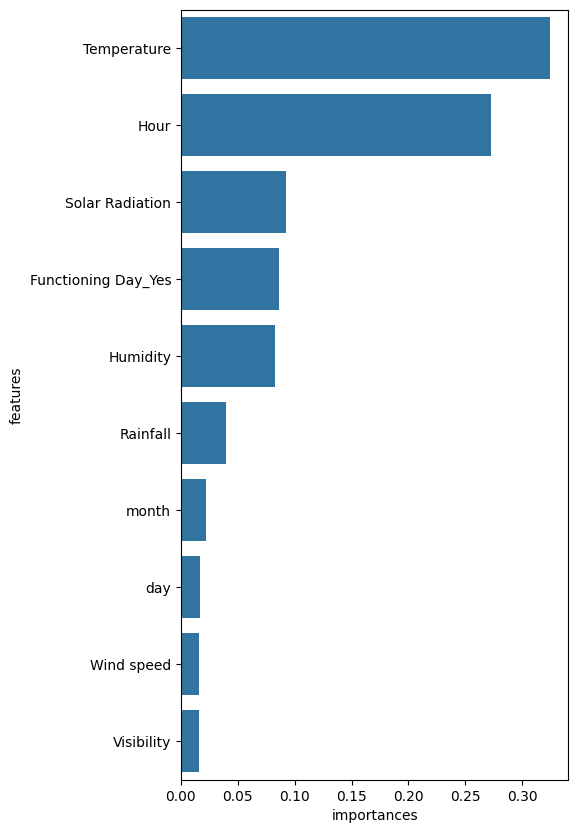

In [ ]:
plt.figure(figsize=(5, 10))
sns.barplot(x='importances', y='features', data=top10)